In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [35]:
df_geotaged_Tokyo = pd.read_csv("/home/is/shuntaro-o/dev/NLP_2023/data/202271month_per_hour_in_disaster.csv", engine='python')

In [58]:
df_geotaged_Tokyo_station = df_geotaged_Tokyo

In [73]:
df_geotaged_Tokyo_station

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,author_followers,author_tweets,author_description,author_location,creatid_at_day,creatid_at_hour
0,0,明日に向けて備えて寝ましょう。17982676#stepn#stepnactivationc...,2022-07-01 00:59:51,0.0,0.0,1.0,0,1b0cfebe3424e14f,57272611,yuu0508,2834.0,13162.0,OCS-lead-otaku/JUNKeeeeS 編集部/気になるPJの紹介等やってます🎉ギ...,NaN,01,00
1,1,選挙どうしたら良いものか,2022-07-01 00:59:50,0.0,0.0,1.0,0,27b43920b8b63188,2397886171,tatsuto1004,312.0,11448.0,どうも、みんなのラッキーパーソンです。たんぱく質でできてます。,NaN,01,00
2,2,#万龍軒🐉富士見店大宮さんを訪ねて😆@komiyan690125 野菜らー麺を注文🍜最初は中...,2022-07-01 00:59:47,0.0,2.0,25.0,0,07d9d24b82882000,1506953707795410947,NAMAHAM_DAISUKI,376.0,3428.0,主に千葉県✨ラーメン忘備録&情報収集アカウント🍜絶賛 ＃ラーメンダイエット 中❓❓😅ラーメン...,千葉県人会,01,00
3,3,何を話してるかわかりませんが会員さん同士盛り上がっててほのぼのしました😊 https://t...,2022-07-01 00:59:47,0.0,0.0,31.0,1,77173905596af4ab,277525778,ktanakamura,7120.0,6474.0,UNITED GYM TOKYO代表の中村です。,文京区 湯島,01,00
4,4,スペースおつこれ。おやすみ💤,2022-07-01 00:59:45,0.0,1.0,5.0,0,f7c22e0cf7b3af2b,1360188882109689857,8im21,221.0,5284.0,bts💜コレリスです！😷ノックん,NaN,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74256,95,@nextworker @teracy 是非稲城へおいでください！,2022-07-31 23:58:04,0.0,0.0,3.0,0,0e3222be2e090ee1,348259034,macha780,197.0,1015.0,稲城市青渭神社の神主⛩ライブやコンサート、田舎芝居、青渭獅子舞の篠笛、唄もやってまーす,NaN,31,23
74257,96,@Sara_3ra3ra 宜しくお願いします😁,2022-07-31 23:58:04,0.0,0.0,1.0,0,1df8c91136c4c140,1553740842,kissmeartemis,168.0,7688.0,アニメ大好き🥰ゲームは、モンストやってまーす。モンストやってる人と友達になりたいっす🤗コスプ...,NaN,31,23
74258,97,あーそういや今日熱海試単撮ったんだよね〜うんただそれだけ#EF65 https://t.co...,2022-07-31 23:58:01,1.0,0.0,4.0,0,1df8c91136c4c140,1497860700529573892,ketodanntai,818.0,607.0,こんにちはYouTubeやってるのでぜひチャンネル登録と高評価よろしくお願いします。 フォロ...,京浜東北線,31,23
74259,98,南柏 麺屋 神工限定のシビカラ麻辣まぜそばあぶらニンニクシピレ麺量100gにしてもゴロゴロ塊...,2022-07-31 23:58:01,0.0,0.0,1.0,0,12b7c30f70547000,276850452,porto_0514,88.0,1646.0,ソムリエです。戦争反対。,NaN,31,23


In [60]:
df_geotaged_Tokyo_station["created_at"]=df_geotaged_Tokyo_station["created_at"].astype(str)
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station.reset_index(drop=True)
created_time=df_geotaged_Tokyo_station.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_geotaged_Tokyo_station=pd.concat([df_geotaged_Tokyo_station,creatid_at_day_list],axis=1)
df_geotaged_Tokyo_station=df_geotaged_Tokyo_station.rename(columns={0: 'creatid_at_day'})
df_geotaged_Tokyo_station=pd.concat([df_geotaged_Tokyo_station,creatid_at_hour_list],axis=1)
df_geotaged_Tokyo_station=df_geotaged_Tokyo_station.rename(columns={0: 'creatid_at_hour'})

In [61]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [62]:
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station[df_geotaged_Tokyo_station['creatid_at_day'].isin(day_list)]
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station[df_geotaged_Tokyo_station['creatid_at_hour'].isin(hour_list)]

In [63]:
df_geotaged_Tokyo_station['created_at'] = pd.to_datetime(df_geotaged_Tokyo_station['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [64]:
df_geotaged_Tokyo_station = df_geotaged_Tokyo_station.dropna(subset=['created_at'])

In [65]:
df_geotaged_Tokyo_station

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,author_followers,author_tweets,author_description,author_location,creatid_at_day,creatid_at_hour
0,0,明日に向けて備えて寝ましょう。17982676#stepn#stepnactivationc...,2022-07-01 00:59:51,0.0,0.0,1.0,0,1b0cfebe3424e14f,57272611,yuu0508,2834.0,13162.0,OCS-lead-otaku/JUNKeeeeS 編集部/気になるPJの紹介等やってます🎉ギ...,NaN,01,00
1,1,選挙どうしたら良いものか,2022-07-01 00:59:50,0.0,0.0,1.0,0,27b43920b8b63188,2397886171,tatsuto1004,312.0,11448.0,どうも、みんなのラッキーパーソンです。たんぱく質でできてます。,NaN,01,00
2,2,#万龍軒🐉富士見店大宮さんを訪ねて😆@komiyan690125 野菜らー麺を注文🍜最初は中...,2022-07-01 00:59:47,0.0,2.0,25.0,0,07d9d24b82882000,1506953707795410947,NAMAHAM_DAISUKI,376.0,3428.0,主に千葉県✨ラーメン忘備録&情報収集アカウント🍜絶賛 ＃ラーメンダイエット 中❓❓😅ラーメン...,千葉県人会,01,00
3,3,何を話してるかわかりませんが会員さん同士盛り上がっててほのぼのしました😊 https://t...,2022-07-01 00:59:47,0.0,0.0,31.0,1,77173905596af4ab,277525778,ktanakamura,7120.0,6474.0,UNITED GYM TOKYO代表の中村です。,文京区 湯島,01,00
4,4,スペースおつこれ。おやすみ💤,2022-07-01 00:59:45,0.0,1.0,5.0,0,f7c22e0cf7b3af2b,1360188882109689857,8im21,221.0,5284.0,bts💜コレリスです！😷ノックん,NaN,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74256,95,@nextworker @teracy 是非稲城へおいでください！,2022-07-31 23:58:04,0.0,0.0,3.0,0,0e3222be2e090ee1,348259034,macha780,197.0,1015.0,稲城市青渭神社の神主⛩ライブやコンサート、田舎芝居、青渭獅子舞の篠笛、唄もやってまーす,NaN,31,23
74257,96,@Sara_3ra3ra 宜しくお願いします😁,2022-07-31 23:58:04,0.0,0.0,1.0,0,1df8c91136c4c140,1553740842,kissmeartemis,168.0,7688.0,アニメ大好き🥰ゲームは、モンストやってまーす。モンストやってる人と友達になりたいっす🤗コスプ...,NaN,31,23
74258,97,あーそういや今日熱海試単撮ったんだよね〜うんただそれだけ#EF65 https://t.co...,2022-07-31 23:58:01,1.0,0.0,4.0,0,1df8c91136c4c140,1497860700529573892,ketodanntai,818.0,607.0,こんにちはYouTubeやってるのでぜひチャンネル登録と高評価よろしくお願いします。 フォロ...,京浜東北線,31,23
74259,98,南柏 麺屋 神工限定のシビカラ麻辣まぜそばあぶらニンニクシピレ麺量100gにしてもゴロゴロ塊...,2022-07-31 23:58:01,0.0,0.0,1.0,0,12b7c30f70547000,276850452,porto_0514,88.0,1646.0,ソムリエです。戦争反対。,NaN,31,23


In [66]:
list_tweet_range = []
for day in day_list:
    day = int(day)
    df_perday = df_geotaged_Tokyo_station[(df_geotaged_Tokyo_station['created_at'].dt.day==day)]
    list_tweet_range_per_day = []
    for hour in hour_list:
        hour = int(hour)
        end_time = df_perday[(df_perday['created_at'].dt.hour==hour)].head(1)['created_at'].values
        start_time = df_perday[(df_perday['created_at'].dt.hour==hour)].tail(1)['created_at'].values
        delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_per_day.append(delta)
    list_tweet_range.append(list_tweet_range_per_day)

In [68]:
list_tweets_count = []
for day in day_list:
    day = int(day)
    df_perday = df_geotaged_Tokyo_station[(df_geotaged_Tokyo_station['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_per_hour.append(0)
    list_tweets_count.append(list_tweets_count_per_hour)

In [69]:
list_tweet_range = np.array(list_tweet_range)
list_tweets_count = np.array(list_tweets_count)
estimate = list_tweets_count*(3600/list_tweet_range)

In [74]:
list_tweet_range_month7 = []
for day in day_list:
    day = int(day)
    df_perday = df_geotaged_Tokyo_station[(df_geotaged_Tokyo_station['created_at'].dt.day==day)]
    list_tweet_range_month7_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month7_per_day.append(delta)
    list_tweet_range_month7.append(list_tweet_range_month7_per_day)
list_tweets_count_month7 = []
for day in day_list:
    day = int(day)
    df_perday = df_geotaged_Tokyo_station[(df_geotaged_Tokyo_station['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month7_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month7_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month7_per_hour.append(0)
    list_tweets_count_month7.append(list_tweets_count_month7_per_hour)
list_tweet_range_month7 = np.array(list_tweet_range_month7)
list_tweets_count_month7 = np.array(list_tweets_count_month7)
estimate_month7 = list_tweets_count_month7*(3600/list_tweet_range_month7)

In [70]:
estimate = scipy.stats.zscore(estimate)

Text(69.0, 0.5, 'day')

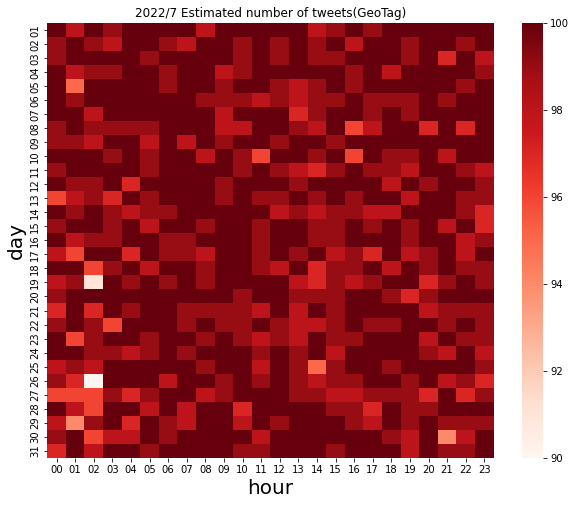

In [75]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(list_tweets_count,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(GeoTag)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)